In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
def simulate_bernoulli_ttest(n_samples=1000, probability=0.2, num_simulations=1000):
    """
    Генерирует две выборки из распределения Бернулли, применяет t-критерий Стьюдента и возвращает p-value.

    Args:
        n_samples (int): Количество элементов в каждой выборке.
        probability (float): Вероятность успеха в распределении Бернулли.
        num_simulations (int): Количество симуляций.

    Returns:
        list: Список p-value для каждой симуляции.
    """
    p_values = []
    for _ in range(num_simulations):
        # Генерируем две выборки из биномиального распределения (аппроксимация Бернулли)
        sample1 = np.random.binomial(1, probability, n_samples)
        sample2 = np.random.binomial(1, probability, n_samples)

        # Применяем t-критерий Стьюдента
        result = stats.ttest_ind(sample1, sample2)
        p_values.append(result.pvalue)
    return p_values

In [5]:
num_simulations = 10000
p_values = simulate_bernoulli_ttest(num_simulations=num_simulations)

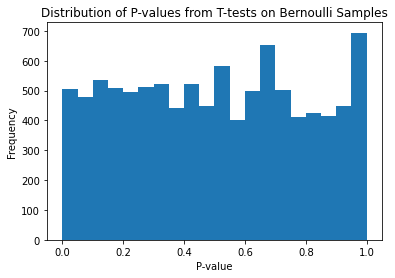

In [6]:
plt.hist(p_values, bins=20)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-values from T-tests on Bernoulli Samples')
plt.show()

In [8]:
false_positives = sum(p < 0.05 for p in p_values)
false_positive_rate = false_positives / len(p_values)
false_positive_rate

0.0504

In [9]:
num_simulations = 1000
p_values = simulate_bernoulli_ttest(num_simulations=num_simulations)

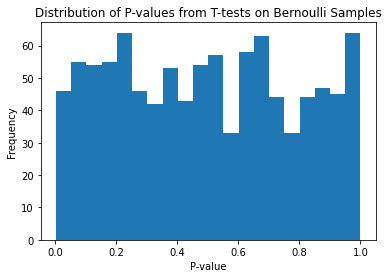

In [10]:
plt.hist(p_values, bins=20)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-values from T-tests on Bernoulli Samples')
plt.show()

In [11]:
false_positives = sum(p < 0.05 for p in p_values)
false_positive_rate = false_positives / len(p_values)
false_positive_rate

0.044

In [ ]:
# Проверяет, является ли распределение p-value равномерным с помощью критерия Колмогорова-Смирнова.

In [13]:
ks_statistic, ks_p_value = stats.kstest(p_values, 'uniform')
print(f"Kolmogorov-Smirnov test p-value: {ks_p_value}", ks_p_value > 0.05)

Kolmogorov-Smirnov test p-value: 0.38120516197691334 True


In [14]:
def estimate_power(
    control_mean=200,
    control_std=30,
    treatment_mean=205,
    sample_size=500,
    num_simulations=1000,
    alpha=0.05,
):
    """
    Оценивает мощность t-критерия Стьюдента с помощью симуляций.

    Args:
        control_mean (float): Среднее значение в контрольной группе.
        control_std (float): Среднеквадратичное отклонение в контрольной группе.
        treatment_mean (float): Среднее значение в тестовой группе.
        sample_size (int): Размер каждой выборки (контрольной и тестовой).
        num_simulations (int): Количество симуляций.
        alpha (float): Уровень значимости.

    Returns:
        float: Оценка мощности (доля симуляций, в которых p-value меньше alpha).
    """
    detections = 0
    for _ in range(num_simulations):
        # Генерируем выборки из нормального распределения
        control_sample = np.random.normal(control_mean, control_std, sample_size)
        treatment_sample = np.random.normal(treatment_mean, control_std, sample_size)

        # Применяем t-критерий Стьюдента
        result = stats.ttest_ind(control_sample, treatment_sample, equal_var=True)
        p_value = result.pvalue

        # Проверяем, отклоняется ли нулевая гипотеза
        if p_value < alpha:
            detections += 1

    # Оцениваем мощность
    power = detections / num_simulations
    return power


# Запускаем симуляции
num_simulations = 10000  # Увеличиваем число симуляций для более точной оценки
power = estimate_power(num_simulations=num_simulations)

print(f"Estimated Power: {power}")

Estimated Power: 0.7452
